 # **01418462 Artificial Intelligence Mini Project 2**

#### **สมาชิก**

นางสาวปรริณ คงเจริญเขตร์ รหัสนิสิต 6410451156  
นางสาวธนพร แซ่ลิ้ม รหัสนิสิต 6410450991
นายรัชพล หินซุย รหัสนิสิต 6410450257

**ประเทศที่เลือก** : สเปน

 ###### Import Library

##### **import library**
- **pandas** *for data manipulation and analysis*
- **seaborn** *for plot for creating statistical data visualizations*
- **matplotlib.pyplot** *for creating statistical data visualizations*
    

In [409]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [410]:
df = pd.read_csv('Apple462.csv')

In [411]:
df

,Unnamed: 0,Date,Envi,Fuji,Gala,region
0,0,27/12/2015,1037,54455,48,Spain
1,1,20/12/2015,674,44639,58,Spain
2,2,13/12/2015,795,109150,131,Spain
3,3,6/12/2015,1132,71976,73,Spain
4,4,29/11/2015,941,43838,76,Spain
...,...,...,...,...,...,...
3544,7,4/2/2018,96085,2250967,3253,Portugal
3545,8,28/1/2018,82653,1501055,746,Portugal
3546,9,21/1/2018,46444,1642533,1165,Portugal
3547,10,14/1/2018,39682,818052,1338,Portugal


##### ตัดประเทศให้เหลือแค่สเปน

In [412]:
df = df[df.region == "Spain"]

## Clean Data

##### Drop column "Unnamed: 0", Reset Index, Change Date column to date type

In [413]:
df = df.drop(['Unnamed: 0','region'], axis=1)
df = df.reset_index().drop('index',axis=1)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df

,Date,Envi,Fuji,Gala
0,2015-12-27,1037,54455,48
1,2015-12-20,674,44639,58
2,2015-12-13,795,109150,131
3,2015-12-06,1132,71976,73
4,2015-11-29,941,43838,76
...,...,...,...,...
164,2018-02-04,7626,195725,144
165,2018-01-28,3101,74627,56
166,2018-01-21,3133,116521,89
167,2018-01-14,2897,76571,44


In [414]:
df['Gala'] = pd.to_numeric(df['Gala'], errors='coerce')
df['Envi'] = pd.to_numeric(df['Envi'], errors='coerce')
df['Fuji'] = pd.to_numeric(df['Fuji'], errors='coerce')

In [415]:
df['Gala'].replace(' ', np.nan, inplace=True)
df['Fuji'].replace(' ', np.nan, inplace=True)
df['Envi'].replace(' ', np.nan, inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17236\1903680882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gala'].replace(' ', np.nan, inplace=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17236\1903680882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [416]:
df.Gala = df['Gala'].interpolate()
df.Fuji = df['Fuji'].interpolate()
df.Envi = df['Envi'].interpolate()

##### แยกสายพันธุ์

In [417]:
envi = df.drop(['Fuji', 'Gala'], axis=1)
fuji = df.drop(['Envi','Gala'],axis=1)
gala = df.drop(['Envi','Fuji'],axis=1)

# Gala

In [418]:
#pd.set_option('display.max_rows', None)
gala

,Date,Gala
0,2015-12-27,48.0
1,2015-12-20,58.0
2,2015-12-13,131.0
3,2015-12-06,73.0
4,2015-11-29,76.0
...,...,...
164,2018-02-04,144.0
165,2018-01-28,56.0
166,2018-01-21,89.0
167,2018-01-14,44.0


In [419]:
gala = gala.set_index('Date')
gala.sort_index(ascending=True)

,Gala
Date,
2015-01-04,50.0
2015-01-11,127.0
2015-01-18,136.0
2015-01-25,164.0
2015-02-01,179.0
...,...
2018-02-25,48.0
2018-03-04,96.0
2018-03-11,70.0


#### Visualize

<Axes: xlabel='Date', ylabel='Gala'>

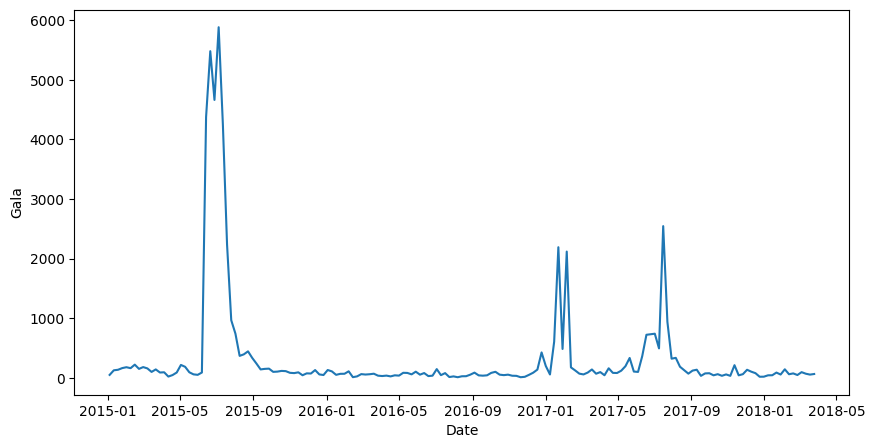

In [420]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=gala, x='Date', y='Gala')

In [421]:
#gala.sort_index(ascending=True)

In [422]:
gala['y'] = gala['Gala'].shift(-1)
gala = gala.drop(gala.tail(1).index)
gala

,Gala,y
Date,,
2015-12-27,48.0,58.0
2015-12-20,58.0,131.0
2015-12-13,131.0,73.0
2015-12-06,73.0,76.0
2015-11-29,76.0,44.0
...,...,...
2018-02-11,61.0,144.0
2018-02-04,144.0,56.0
2018-01-28,56.0,89.0


#### Baseline_pred

In [423]:
gala['baseline_pred'] = gala['Gala']

#### Decision Tree Regressor

In [424]:
from sklearn.tree import DecisionTreeRegressor

X_train = gala['Gala'].values.reshape(-1, 1)
y_train = gala['y'].values.reshape(-1, 1)
X_test = gala['Gala'].values.reshape(-1, 1)


dt_reg = DecisionTreeRegressor(random_state=320)
dt_reg.fit(X_train, y_train)

dt_pred = dt_reg.predict(X_test)

gala['dt_pred'] = dt_pred

In [425]:
gala

,Gala,y,baseline_pred,dt_pred
Date,,,,
2015-12-27,48.0,58.0,48.0,66.500000
2015-12-20,58.0,131.0,58.0,79.000000
2015-12-13,131.0,73.0,131.0,73.000000
2015-12-06,73.0,76.0,73.0,76.000000
2015-11-29,76.0,44.0,76.0,44.000000
...,...,...,...,...
2018-02-11,61.0,144.0,61.0,100.000000
2018-02-04,144.0,56.0,144.0,56.000000
2018-01-28,56.0,89.0,56.0,76.000000


#### Gradient Boosting

In [426]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=320)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
gala['gbr_pred'] = gbr_pred
gala

,Gala,y,baseline_pred,dt_pred,gbr_pred
Date,,,,,
2015-12-27,48.0,58.0,48.0,66.500000,77.949802
2015-12-20,58.0,131.0,58.0,79.000000,83.200528
2015-12-13,131.0,73.0,131.0,73.000000,108.159524
2015-12-06,73.0,76.0,73.0,76.000000,80.693828
2015-11-29,76.0,44.0,76.0,44.000000,80.693828
...,...,...,...,...,...
2018-02-11,61.0,144.0,61.0,100.000000,83.200528
2018-02-04,144.0,56.0,144.0,56.000000,102.287930
2018-01-28,56.0,89.0,56.0,76.000000,83.200528


### MAPE 

In [427]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Calculate the absolute percentage error for each data point
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    
    # Compute the mean of the absolute percentage errors
    mean_absolute_percentage_error = np.mean(absolute_percentage_error)
    
    # Convert the mean absolute percentage error to percentage and round to 2 decimal places
    return round(mean_absolute_percentage_error *100, 2)


In [428]:
#def mape(y_true, y_pred):
 #   return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

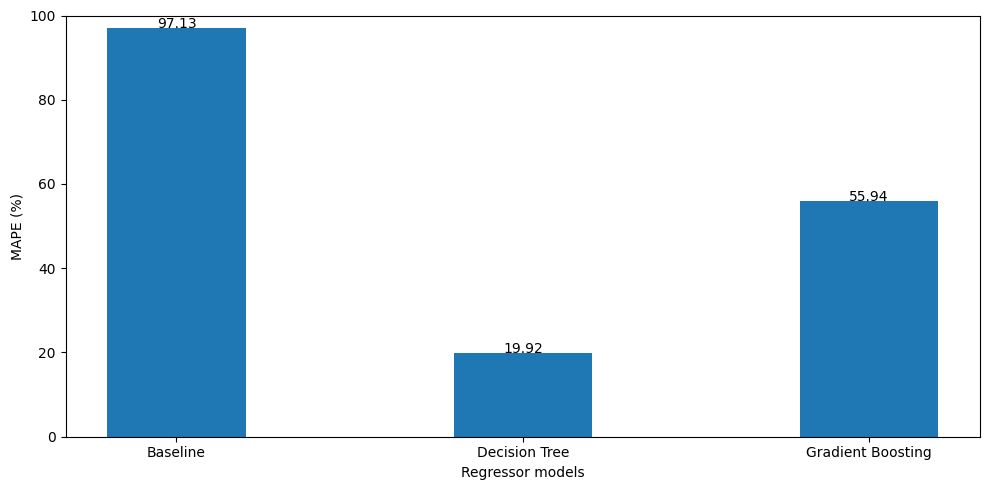

In [429]:
baseline_mape = mape(gala['y'], gala['baseline_pred']) 
dt_mape = mape(gala['y'], gala['dt_pred']) 
gbr_mape = mape(gala['Gala'], gala['gbr_pred']) 

# Bar plot data
x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 100)

# Adding text labels to each bar
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Predict the next time step using a sequence of past observations

In [430]:
def window_input(window_length: int, data: pd.DataFrame) ->pd.DataFrame:
    df= data.copy()
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['Gala'].shift(-i)
        i = i + 1
    if i == window_length:
        df['y'] = df['Gala'].shift(-i)
# Drop rows where there is a NaN 
    df= df.dropna(axis=0)
    return df

In [431]:
df_gala = df.drop(['Envi','Fuji'],axis=1)

In [432]:
new_gala = window_input(5, df_gala)

In [433]:
new_gala

,Date,Gala,x_1,x_2,x_3,x_4,y
0,2015-12-27,48.0,58.0,131.0,73.0,76.0,44.0
1,2015-12-20,58.0,131.0,73.0,76.0,44.0,93.0
2,2015-12-13,131.0,73.0,76.0,44.0,93.0,80.0
3,2015-12-06,73.0,76.0,44.0,93.0,80.0,85.0
4,2015-11-29,76.0,44.0,93.0,80.0,85.0,113.0
...,...,...,...,...,...,...,...
159,2018-03-11,70.0,96.0,48.0,75.0,61.0,144.0
160,2018-03-04,96.0,48.0,75.0,61.0,144.0,56.0
161,2018-02-25,48.0,75.0,61.0,144.0,56.0,89.0
162,2018-02-18,75.0,61.0,144.0,56.0,89.0,44.0


##### Spilt the data into a traininig and a test set

In [434]:
from sklearn.model_selection import train_test_split

X = new_gala[['Gala', 'x_1', 'x_2', 'x_3', 'x_4']].values
y = new_gala['y'].values

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=320, shuffle=False)

In [435]:
baseline_pred = []

for row in X_test:
    baseline_pred.append(np.mean(row))

Decision Tree Regressor

In [436]:
dt_reg_5 = DecisionTreeRegressor(random_state=320)
dt_reg_5.fit(X_train, y_train)
dt_reg_5_pred = dt_reg_5.predict(X_test)

Gredient Boosting

In [437]:
gbr_5 = GradientBoostingRegressor(random_state=320)
gbr_5.fit(X_train, y_train.ravel())
gbr_5_pred = gbr_5.predict(X_test)


Evaluation

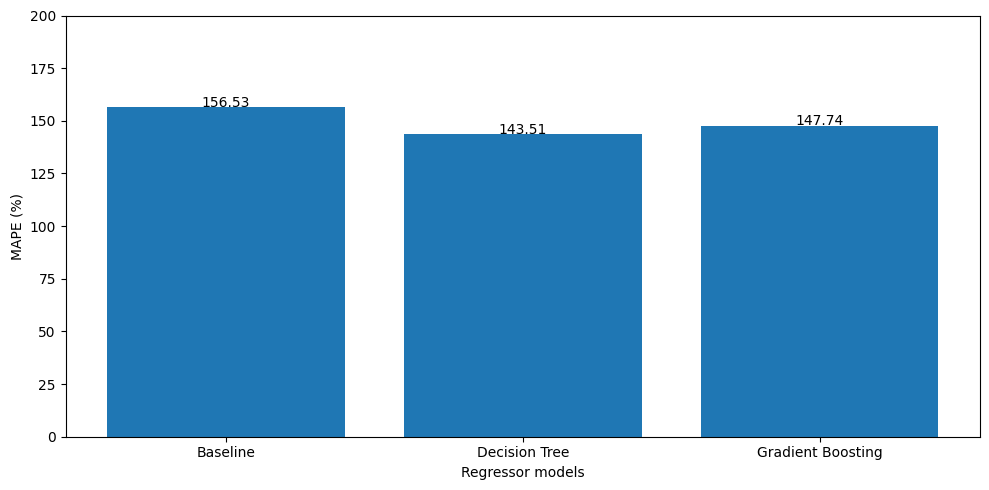

In [438]:
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_percentage_error
# baseline_mape = mean_absolute_percentage_error(y_test, baseline_pred) 
# dt_5_mape = mean_absolute_percentage_error(y_test, dt_reg_5_pred) 
# gbr_5_mape = mean_absolute_percentage_error(y_test, gbr_5_pred) 

baseline_mape = mape(y_test, baseline_pred) 
dt_5_mape = mape(y_test, dt_reg_5_pred) 
gbr_5_mape = mape(y_test, gbr_5_pred) 

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_5_mape, gbr_5_mape]

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, y, width=0.8)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 200)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.1, s=str(value), ha='center')

plt.tight_layout()

plt.show()

Format the dataset

In [439]:
def window_input_output(input_length: int, output_length: int, data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()
    i = 1
    while i<input_length:
        df[f'x_{i}'] = df['Gala'].shift(-i) 
        i = i + 1
    j = 0
    while j < output_length:
        df[f'y_{j}']=df['Gala'].shift(-output_length-j)
        j = j+1
    df = df.dropna (axis=0)
    return df

In [440]:
seq_gala = window_input_output(26, 26, new_gala)
seq_gala

,Date,Gala,x_1,x_2,x_3,x_4,y,x_5,x_6,x_7,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
0,2015-12-27,48.0,58.0,131.0,73.0,76.0,44.0,44.0,93.0,80.0,...,159.0,181.0,151.0,222.0,163.0,179.0,164.0,136.0,127.0,50.0
1,2015-12-20,58.0,131.0,73.0,76.0,44.0,93.0,93.0,80.0,85.0,...,181.0,151.0,222.0,163.0,179.0,164.0,136.0,127.0,50.0,427.0
2,2015-12-13,131.0,73.0,76.0,44.0,93.0,80.0,80.0,85.0,113.0,...,151.0,222.0,163.0,179.0,164.0,136.0,127.0,50.0,427.0,139.0
3,2015-12-06,73.0,76.0,44.0,93.0,80.0,85.0,85.0,113.0,117.0,...,222.0,163.0,179.0,164.0,136.0,127.0,50.0,427.0,139.0,87.0
4,2015-11-29,76.0,44.0,93.0,80.0,85.0,113.0,113.0,117.0,105.0,...,163.0,179.0,164.0,136.0,127.0,50.0,427.0,139.0,87.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2017-12-03,136.0,62.0,43.0,213.0,34.0,58.0,58.0,35.0,62.0,...,176.0,2119.0,485.0,2192.0,607.0,57.0,200.0,65.0,55.0,70.0
109,2017-11-26,62.0,43.0,213.0,34.0,58.0,35.0,35.0,62.0,43.0,...,2119.0,485.0,2192.0,607.0,57.0,200.0,65.0,55.0,70.0,96.0
110,2017-11-19,43.0,213.0,34.0,58.0,35.0,62.0,62.0,43.0,78.0,...,485.0,2192.0,607.0,57.0,200.0,65.0,55.0,70.0,96.0,48.0
111,2017-11-12,213.0,34.0,58.0,35.0,62.0,43.0,43.0,78.0,75.0,...,2192.0,607.0,57.0,200.0,65.0,55.0,70.0,96.0,48.0,75.0


In [441]:
from sklearn.model_selection import train_test_split

X_cols = [col for col in seq_gala.columns if col.startswith('x')]
X_cols.insert(0, 'Gala')
y_cols = [col for col in seq_gala.columns if col.startswith('y')]

X = seq_gala[X_cols].values
y = seq_gala[y_cols].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Decision Tree

In [442]:
dt_seq= DecisionTreeRegressor (random_state=42)
dt_seq.fit(X_train, y_train)
dt_seq_preds = dt_seq.predict(X_test)

Regressor Chain

In [443]:
from sklearn.multioutput import RegressorChain
gbr_seq= GradientBoostingRegressor (random_state=42)
chained_gbr = RegressorChain (gbr_seq)
chained_gbr.fit(X_train, y_train)
gbr_seq_preds = chained_gbr.predict(X_test)

Evaluation

In [444]:
mape_dt_seq= mape(dt_seq_preds.reshape(1, -1), y_test.reshape(1,-1))
mape_gbr_seq= mape(gbr_seq_preds.reshape(1, -1), y_test.reshape(1,-1))
y_test = y_test[:, 1:]
mape_baseline = mape(X_test.reshape(1, -1), y_test.reshape(1, -1)) 

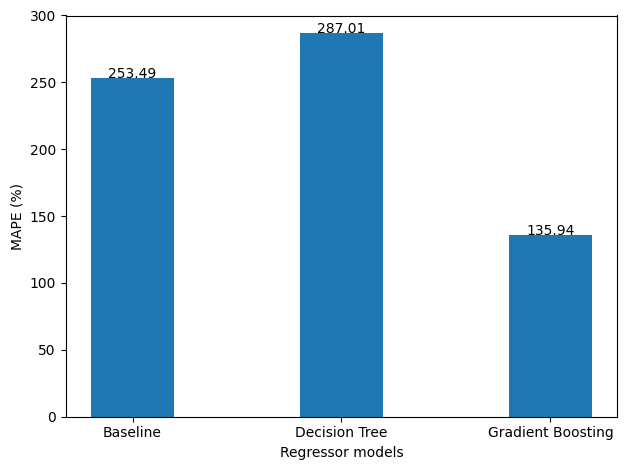

In [445]:
# Generate the bar plot
fig, ax = plt.subplots()
x = ['Baseline', 'Decision Tree', 'Gradient Boosting'] 
y = [mape_baseline, mape_dt_seq, mape_gbr_seq]
ax.bar(x, y, width=0.4) 
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 300)

for index, value in enumerate(y): 
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

Visualize

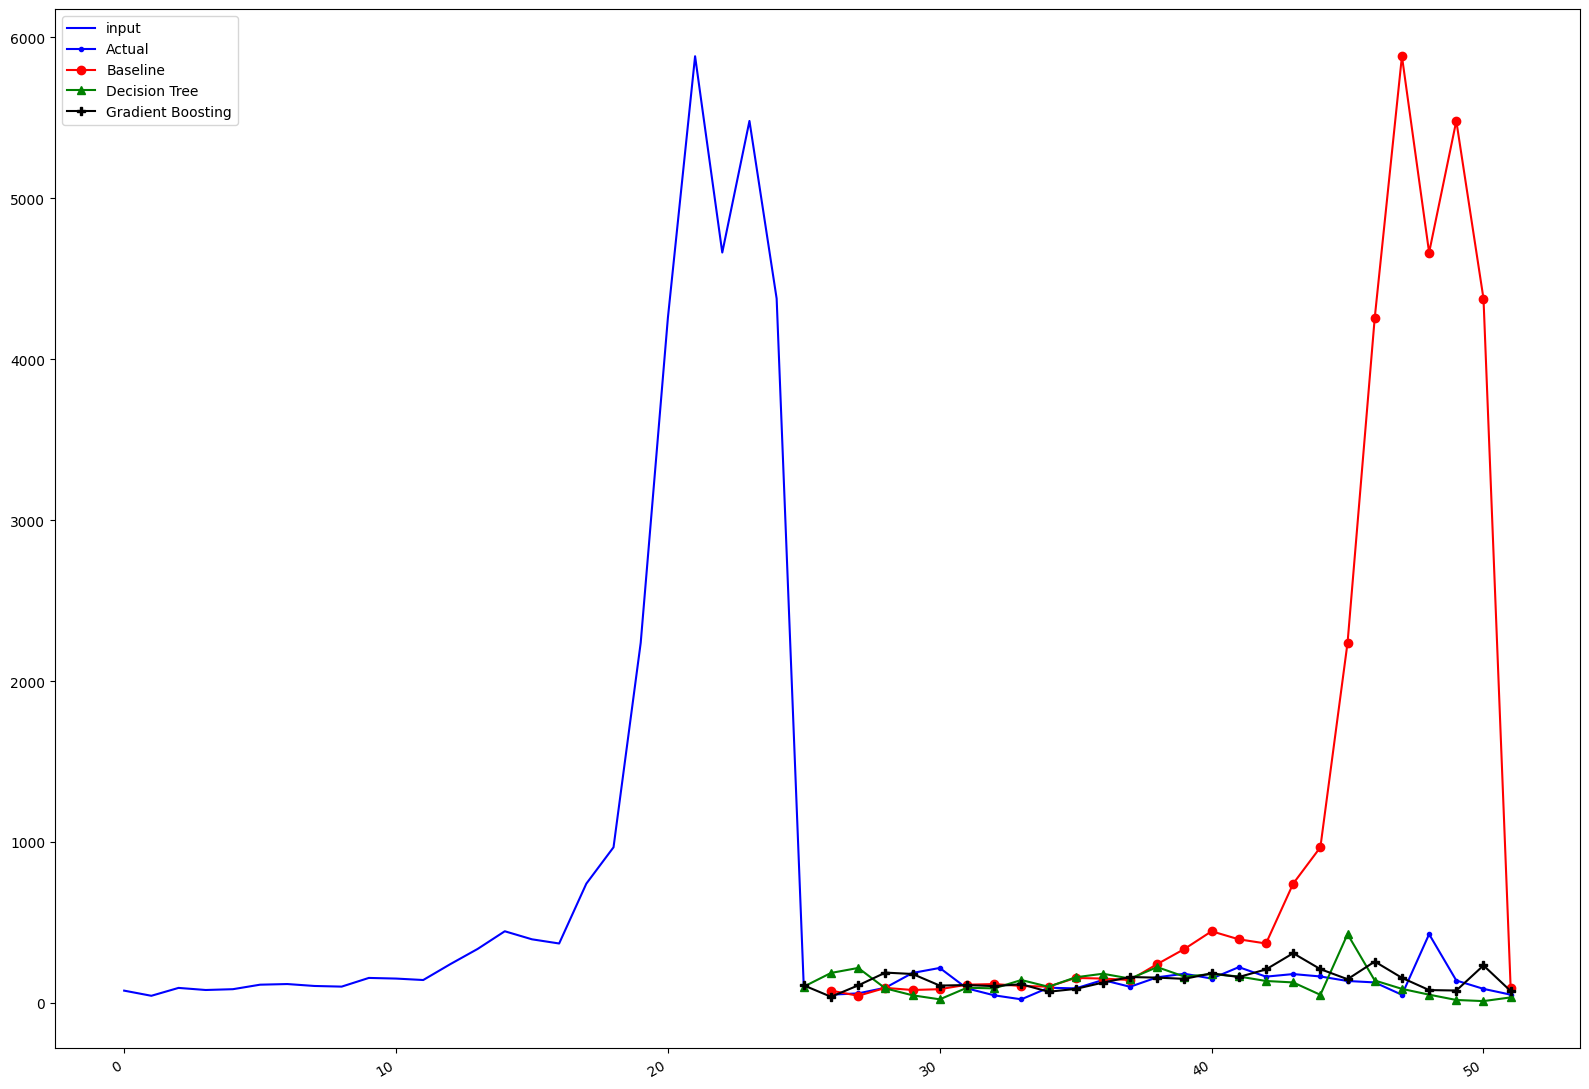

In [446]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(np.arange(0, 26, 1), X_test[1], 'b-', label='input') 
ax.plot(np.arange(26, 52, 1), y_test[1], marker='.', color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), X_test[1], marker='o', color='red', label='Baseline')
ax.plot(np.arange(25, 52, 1), dt_seq_preds[1], marker='^',color='green', label='Decision Tree')
ax.plot(np.arange(25, 52, 1), gbr_seq_preds [1], marker='P',color='black', label='Gradient Boosting')

#plt.xticks(np.arange(1, 104, 52), np.arange(2000, 2002, 1))
plt.legend (loc=2)
fig.autofmt_xdate()
plt.tight_layout()

# Prediction Modal Envi Apple

In [447]:
envi

,Date,Envi
0,2015-12-27,1037.0
1,2015-12-20,674.0
2,2015-12-13,795.0
3,2015-12-06,1132.0
4,2015-11-29,941.0
...,...,...
164,2018-02-04,7626.0
165,2018-01-28,3101.0
166,2018-01-21,3133.0
167,2018-01-14,2897.0


### Visualize

<Axes: xlabel='Date', ylabel='Envi'>

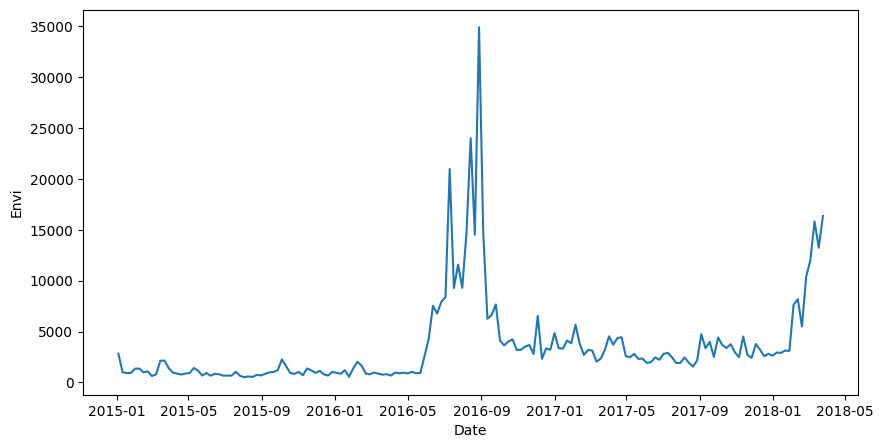

In [448]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=envi, x='Date', y='Envi')

### Change Date to toordinal and Sort Date


In [449]:


# envi['Date'] = envi['Date'].map(dt.datetime.toordinal)

# envi

envi.set_index('Date', inplace=True)
envi.sort_index(ascending=True)
envi

,Envi
Date,
2015-12-27,1037.0
2015-12-20,674.0
2015-12-13,795.0
2015-12-06,1132.0
2015-11-29,941.0
...,...
2018-02-04,7626.0
2018-01-28,3101.0
2018-01-21,3133.0


In [450]:
import datetime as dt

envi.index = envi.index.map(dt.datetime.toordinal)
envi.reset_index(inplace=True)
envi.rename(columns={'index': 'Date'}, inplace=True)
envi


,Date,Envi
0,735959,1037.0
1,735952,674.0
2,735945,795.0
3,735938,1132.0
4,735931,941.0
...,...,...
164,736729,7626.0
165,736722,3101.0
166,736715,3133.0
167,736708,2897.0


### Prepare Train and Test Data

In [451]:
# Split the data into features (X) and target variable (y)


X = envi[['Date']]  # Replace 'feature1', 'feature2', ... with actual feature names
y = envi['Envi']  # Replace 'Envi' with actual target variable name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=320)

### Decision Tree Regressor


In [452]:
# Create the Decision Tree Regressor model
model_decision = DecisionTreeRegressor(max_depth=7,min_samples_split=3,min_samples_leaf=3)

# Fit the model to the training data
model_decision.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_decision.predict(X_test)

### Gradient Boosting

In [453]:
model_gradient = GradientBoostingRegressor(n_estimators=100, learning_rate=0.8, max_depth=1, random_state=320)
model_gradient.fit(X_train, y_train)

y_pred_gradient = model_gradient.predict(X_test)

### MAPE

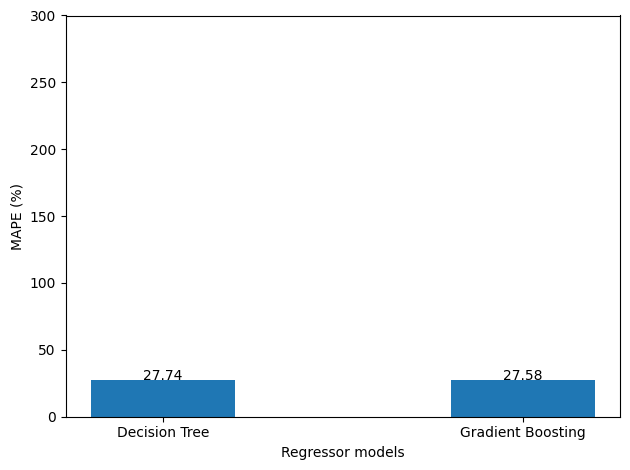

In [454]:
map_decision = mape(y_test, y_pred)
map_gradient = mape(y_test, y_pred_gradient)

# Generate the bar plot
fig, ax = plt.subplots()
x = ['Decision Tree', 'Gradient Boosting']
y = [map_decision, map_gradient]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 300)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

### Accurency Between Decision Tree and Gradient Boosting From Test Data

In [455]:
print("Accuracy Decision Tree: {:.2f}%".format(model_decision.score(X_test, y_test) * 100))
print("Accurency Gradient Boosting : {:.2f}%".format(model_gradient.score(X_test, y_test)  * 100))

Accuracy Decision Tree: 91.90%
Accurency Gradient Boosting : 83.46%


### Graph Bar of Decision Tree and Gradient Boosting From Test Data 

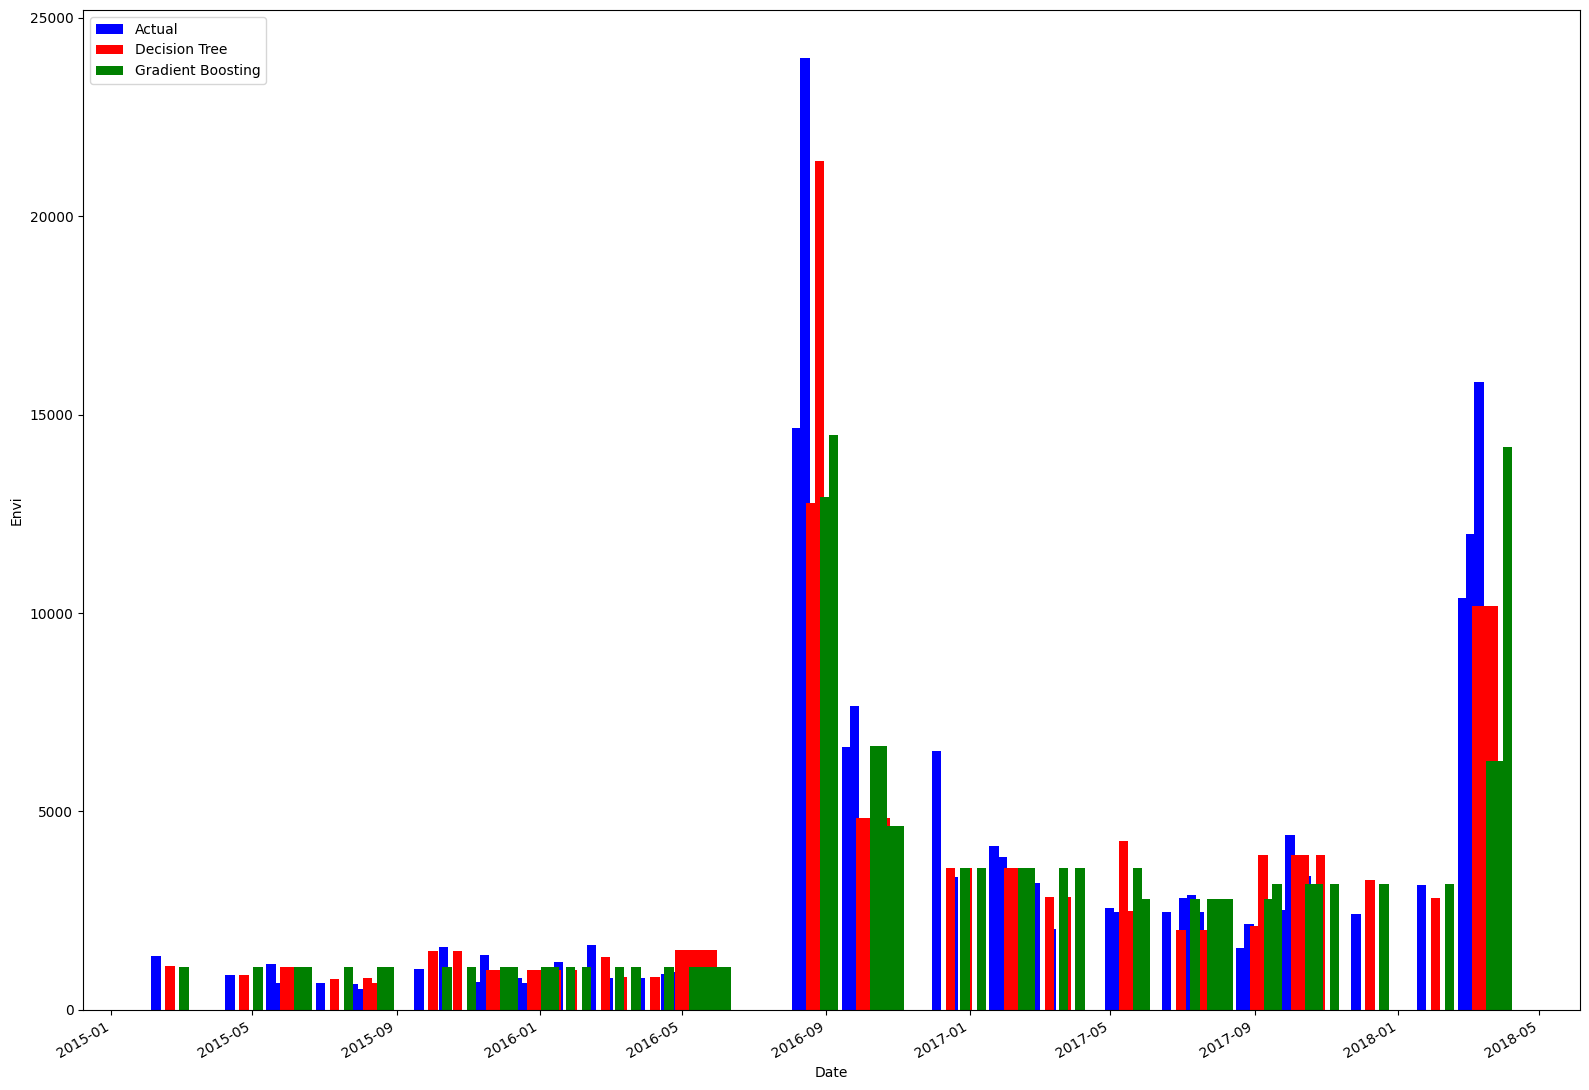

In [456]:

X_test['Date'] = pd.to_datetime(X_test['Date'].apply(dt.datetime.fromordinal))


fig, ax = plt.subplots(figsize=(16, 11))

bar_width = 12
ax.set_xlabel('Date')
ax.set_ylabel('Envi')
ax.bar(X_test['Date'], y_test, color='blue', label='Actual', width=8)
ax.bar(X_test['Date'] + pd.DateOffset(days=bar_width), y_pred, color='red', label='Decision Tree', width=8)
ax.bar(X_test['Date'] + 2*pd.DateOffset(days=bar_width), y_pred_gradient, color='green', label='Gradient Boosting', width=8)


plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()





### Prediction Demo Envi Apple

#### Model Decision Tree  Predict Demo

In [457]:
inputDate = input("Enter the date in the format 'YYYY-MM-DD' (ex: 2024-01-01): ")

# Input the date
input_date = pd.to_datetime(inputDate, format='%Y-%m-%d')  # Replace '2024-01-01' with the desired date
#27/12/2015
# Convert the input date to the ordinal format
input_date_ordinal = input_date.toordinal()

# Predict the Envi value for the input date
predicted_envi = model_decision.predict([[input_date_ordinal]])

print(predicted_envi[0])

1579.0


c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


#### Model Gradient Boosting Predict Demo

In [458]:
inputDate = input("Enter the date in the format 'YYYY-MM-DD' (ex: 2024-01-01): ")

# Input the date
input_date = pd.to_datetime(inputDate, format='%Y-%m-%d')  # Replace '2024-01-01' with the desired date
#27/12/2015
# Convert the input date to the ordinal format
input_date_ordinal = input_date.toordinal()

# Predict the Envi value for the input date
predicted_envi = model_gradient.predict([[input_date_ordinal]])

print(predicted_envi[0])

2434.9254727236867


c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Fuji Model train

fuji เป็น dataset ที่มีการแยกข้อมูลของผลผลิตแอปเปิ้ลสายพันธุ์ Fuji ออกจากข้อมูลทั้งหมด โดยที่ข้อมูลจะประกอบด้วย วันที่ และผลผลิตของแอปเปิ้ลสายพันธุ์ Fuji ที่ได้ในวันที่แต่ละวัน

In [459]:
# Fuji data
fuji

,Date,Fuji
0,2015-12-27,54455.0
1,2015-12-20,44639.0
2,2015-12-13,109150.0
3,2015-12-06,71976.0
4,2015-11-29,43838.0
...,...,...
164,2018-02-04,195725.0
165,2018-01-28,74627.0
166,2018-01-21,116521.0
167,2018-01-14,76571.0


### Visualize

กราฟแสดงผลผลิตของแอปเปิ้ลสายพันธุ์ Fuji โดยแกน Y แสดงค่าของผลผลิตแอปเปิ้ล ส่วนแกน X แสดงวันที่ของการเก็บผลิต

<Axes: xlabel='Date', ylabel='Fuji'>

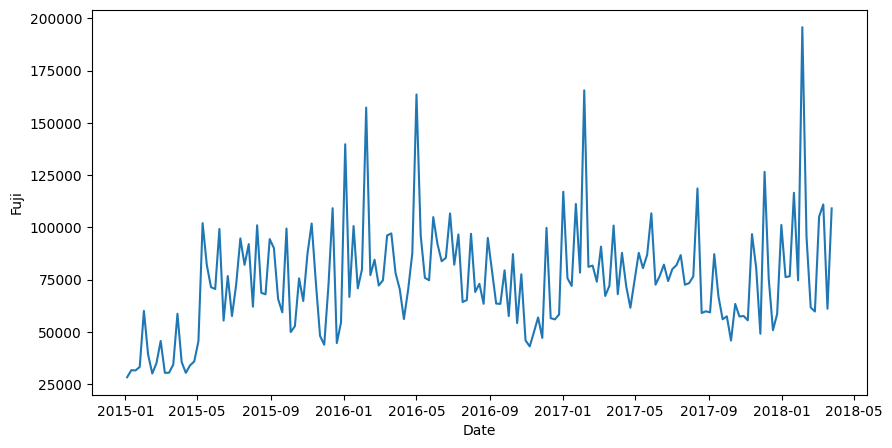

In [460]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=fuji, x='Date', y='Fuji')

### Change Date to toordinal and Sort Date

function นี้จะทำการ soft index โดยใช้วันที่เป็นตัวกำหนดในการ soft

In [461]:
fuji.set_index('Date', inplace=True)
fuji.sort_index(ascending=True)
fuji

,Fuji
Date,
2015-12-27,54455.0
2015-12-20,44639.0
2015-12-13,109150.0
2015-12-06,71976.0
2015-11-29,43838.0
...,...
2018-02-04,195725.0
2018-01-28,74627.0
2018-01-21,116521.0


In [462]:
fuji.index = fuji.index.map(dt.datetime.toordinal)
fuji.reset_index(inplace=True)
fuji.rename(columns={'index': 'Date'}, inplace=True)
fuji

,Date,Fuji
0,735959,54455.0
1,735952,44639.0
2,735945,109150.0
3,735938,71976.0
4,735931,43838.0
...,...,...
164,736729,195725.0
165,736722,74627.0
166,736715,116521.0
167,736708,76571.0


### Prepare Train and Test Data

เราทำการแยกข้อมูล X, y ซึ่งกำหนดให้ข้อมูลแกน X ( ข้อมูลที่ใช้ในการคาดการณ์ค่าที่ต้องการทำนาย )

In [463]:
# Split the data into features (X) and target variable (y)

fuji['x_1'] = fuji['Date'].shift(1)
fuji['x_1'] = fuji['x_1'].bfill()


fuji['x_2'] = fuji['Date'].shift(2)
fuji['x_2'] = fuji['x_2'].bfill()

fuji['x_3'] = fuji['Date'].shift(3)
fuji['x_3'] = fuji['x_3'].bfill()

fuji['x_1'] = fuji['x_1'].interpolate()
fuji['x_2'] = fuji['x_2'].interpolate()
fuji['x_3'] = fuji['x_3'].interpolate()



X = fuji[['Date', 'x_1', 'x_2']]  # Replace 'feature1', 'feature2', ... with actual feature names
y = fuji['Fuji']  # Replace 'Fuji' with actual target variable name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=320)

### Decision Tree Regressor

In [464]:
# Create the Decision Tree Regressor model
# model_decision = DecisionTreeRegressor(max_depth = 6, min_samples_split= 5, min_samples_leaf= 9)
model_decision = DecisionTreeRegressor(max_depth=3, min_samples_leaf= 9, min_samples_split= 5)

# Fit the model to the training data

model_decision.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_decision.predict(X_test)

### Gradient Boosting

In [465]:
model_gradient = GradientBoostingRegressor(n_estimators=90, max_depth=1, subsample= 0.6)
model_gradient.fit(X_train, y_train)

y_pred_gradient = model_gradient.predict(X_test)

### MAPE

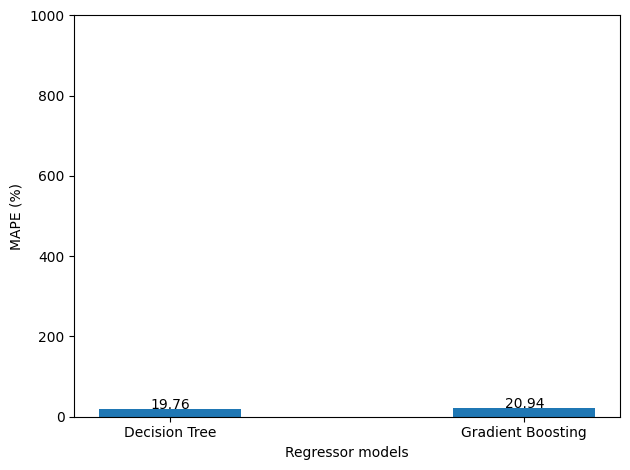

In [466]:
map_decision = mape(y_test, y_pred)
map_gradient = mape(y_test, y_pred_gradient)

# Generate the bar plot
fig, ax = plt.subplots()
x = ['Decision Tree', 'Gradient Boosting']
y = [map_decision, map_gradient]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 1000)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.1, s=str(value), ha='center')
    
plt.tight_layout()

### Accurency Between Decision Tree and Gradient Boosting From Test Data

In [467]:
print("Accuracy Decision Tree: {:.2f}%".format(model_decision.score(X_test, y_test) * 100))
print("Accurency Gradient Boosting : {:.2f}%".format(model_gradient.score(X_test, y_test)  * 100))

Accuracy Decision Tree: 23.31%
Accurency Gradient Boosting : 13.00%


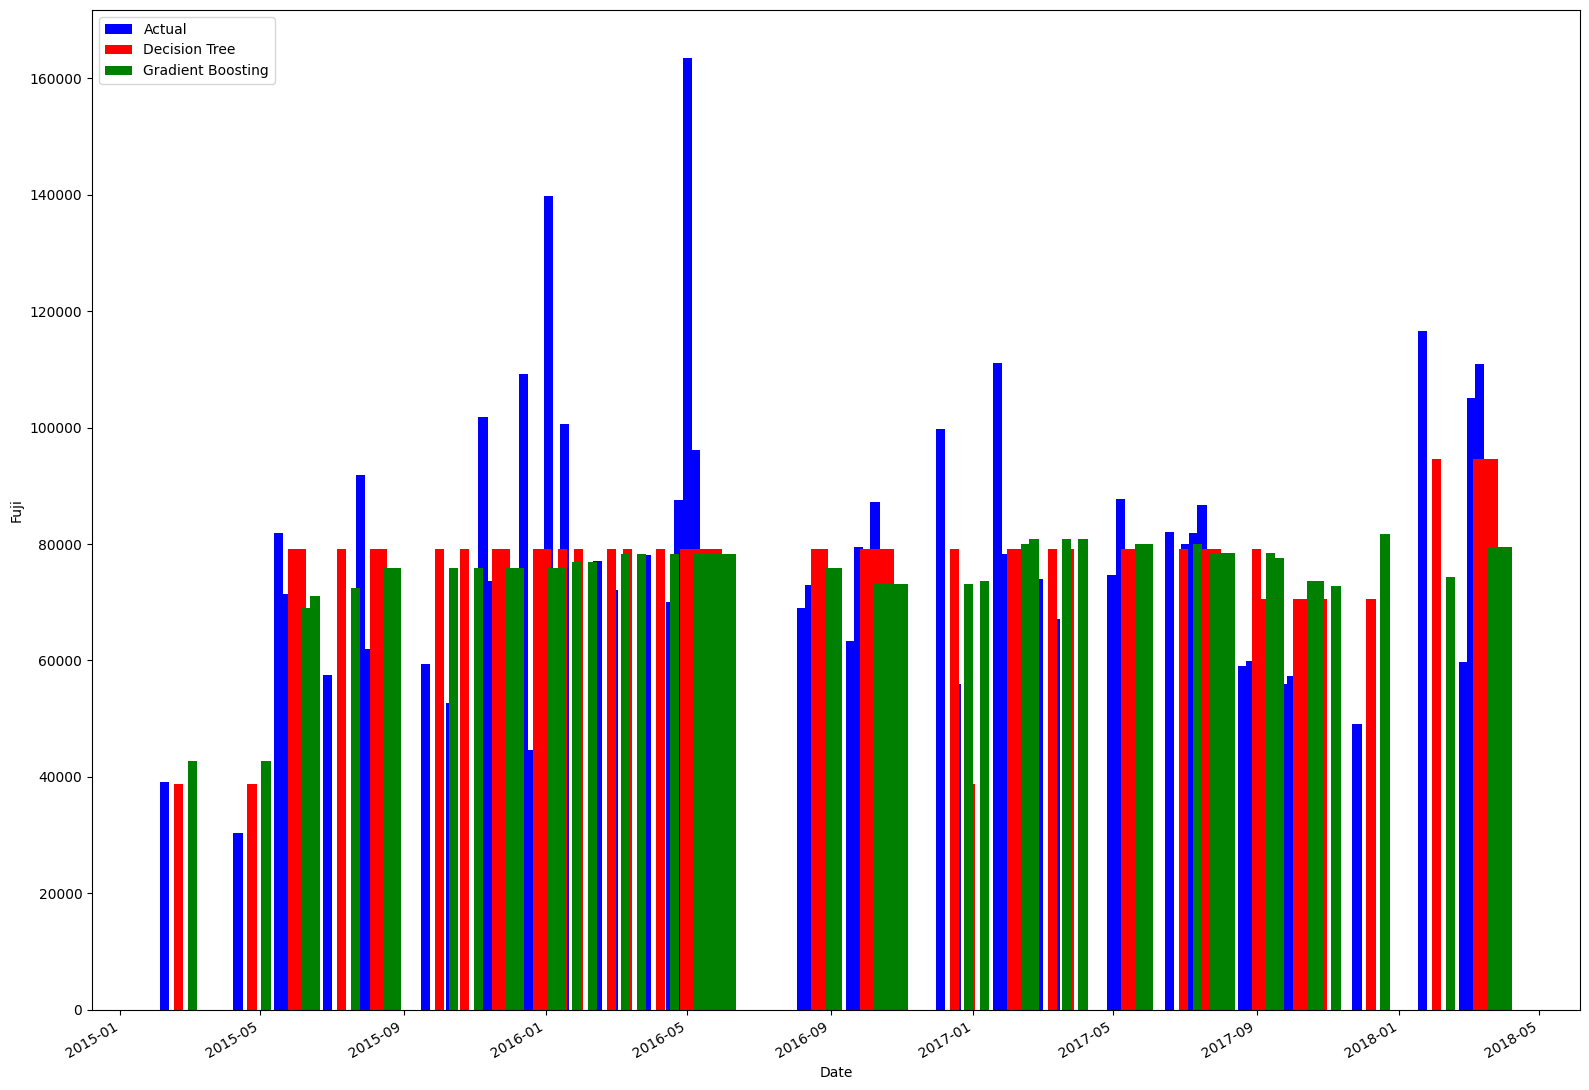

In [468]:

X_test['Date'] = pd.to_datetime(X_test['Date'].apply(dt.datetime.fromordinal))


fig, ax = plt.subplots(figsize=(16, 11))

bar_width = 12
ax.set_xlabel('Date')
ax.set_ylabel('Fuji')
ax.bar(X_test['Date'], y_test, color='blue', label='Actual', width=8)
ax.bar(X_test['Date'] + pd.DateOffset(days=bar_width), y_pred, color='red', label='Decision Tree', width=8)
ax.bar(X_test['Date'] + 2*pd.DateOffset(days=bar_width), y_pred_gradient, color='green', label='Gradient Boosting', width=8)


plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()


The graph illustrates the production of Fuji apple varieties and the output obtained from the predictions of both models.

- The blue bar represents the actual production of Fuji apple varieties

- The red bar represents the production of Fuji apples predicted by the Decision Tree model

- The green bar represents the production of Fuji apples predicted by the Gradient Boosting model

From the graph, it can be observed that, starting from January 2015, the Decision Tree model predicts production closely aligned with the actual production, while the Gradient Boosting model tends to have a lower level of proximity in its predictions. Therefore, it is likely that the Decision Tree model provides predictions that are closer to the actual production compared to the Gradient Boosting model.

In [469]:
# inputDate = input("Enter the date in the format 'YYYY-MM-DD' (ex: 2024-01-01): ")

# # Input the date
# input_date = pd.to_datetime(inputDate, format='%Y-%m-%d')  # Replace '2024-01-01' with the desired date
# #27/12/2015
# # Convert the input date to the ordinal format
# input_date_ordinal = input_date.toordinal()

# # Predict the Fuji value for the input date
# predicted_fuji = model_decision.predict([[input_date_ordinal]])

# print(predicted_fuji[0])

In [470]:
# inputDate = input("Enter the date in the format 'YYYY-MM-DD' (ex: 2024-01-01): ")

# # Input the date
# input_date = pd.to_datetime(inputDate, format='%Y-%m-%d')  # Replace '2024-01-01' with the desired date
# #27/12/2015
# # Convert the input date to the ordinal format
# input_date_ordinal = input_date.toordinal()

# # Predict the Envi value for the input date
# predicted_fuji = model_gradient.predict([[input_date_ordinal]])

# print(predicted_fuji[0])

In [471]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

decision_mse = mean_squared_error(y_test, y_pred)
decision_rmse = np.sqrt(decision_mse)
decision_r2 = r2_score(y_test, y_pred)
decision_mae = mean_absolute_error(y_test, y_pred)

gradient_mse = mean_squared_error(y_test, y_pred_gradient)
gradient_rmse = np.sqrt(gradient_mse)
gradient_r2 = r2_score(y_test, y_pred_gradient)
gradient_mae = mean_absolute_error(y_test, y_pred_gradient)

print("Decision Tree MSE: {:.2f}".format(decision_mse))
print("Decision Tree RMSE: {:.2f}".format(decision_rmse))
print("Decision Tree R2: {:.2f}".format(decision_r2))
print("Decision Tree MAE: {:.2f}".format(decision_mae))


print("Gradient Boosting MSE: {:.2f}".format(gradient_mse))
print("Gradient Boosting RMSE: {:.2f}".format(gradient_rmse))
print("Gradient Boosting R2: {:.2f}".format(gradient_r2))
print("Gradient Boosting MAE: {:.2f}".format(gradient_mae))

Decision Tree MSE: 451970601.08
Decision Tree RMSE: 21259.60
Decision Tree R2: 0.23
Decision Tree MAE: 15148.51
Gradient Boosting MSE: 512765971.05
Gradient Boosting RMSE: 22644.34
Gradient Boosting R2: 0.13
Gradient Boosting MAE: 16435.14


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


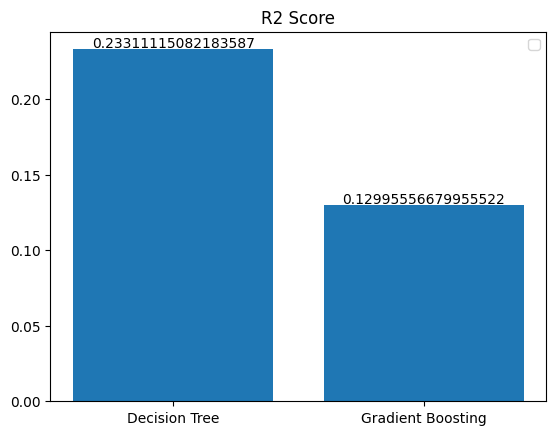

In [472]:
x = np.array(['Decision Tree', 'Gradient Boosting'])
y = np.array([decision_r2, gradient_r2])

plt.bar(x, y)
plt.title('R2 Score')
plt.legend()
    
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.001, s=str(value), ha='center')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


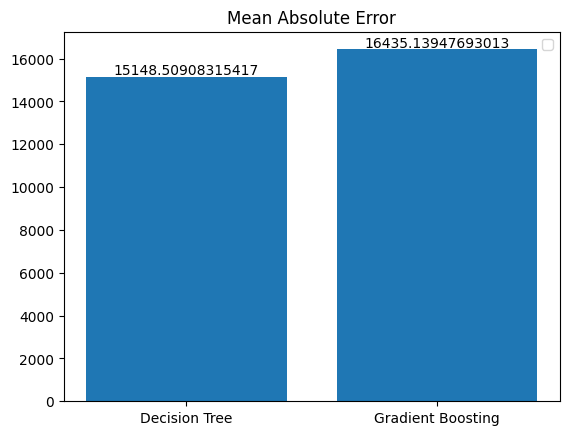

In [473]:
x = np.array(['Decision Tree', 'Gradient Boosting'])
y = np.array([decision_mae, gradient_mae])

plt.bar(x, y)
plt.title('Mean Absolute Error')
plt.legend()

for index, value in enumerate(y):
    plt.text(x=index, y=value + 100, s=str(value), ha='center')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


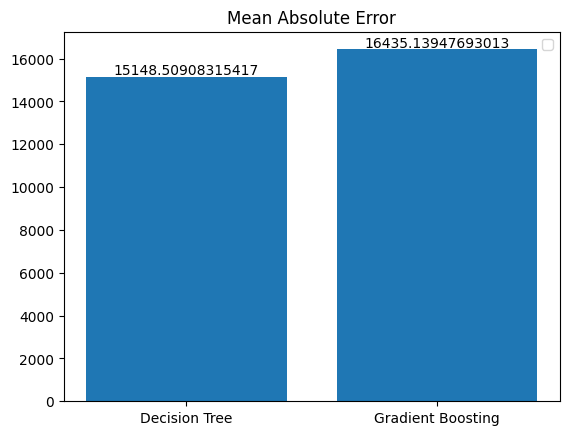

In [474]:
x = np.array(['Decision Tree', 'Gradient Boosting'])
y = np.array([decision_mae, gradient_mae])

plt.bar(x, y)
plt.title('Mean Absolute Error')
plt.legend()

for index, value in enumerate(y):
    plt.text(x=index, y=value + 100, s=str(value), ha='center')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


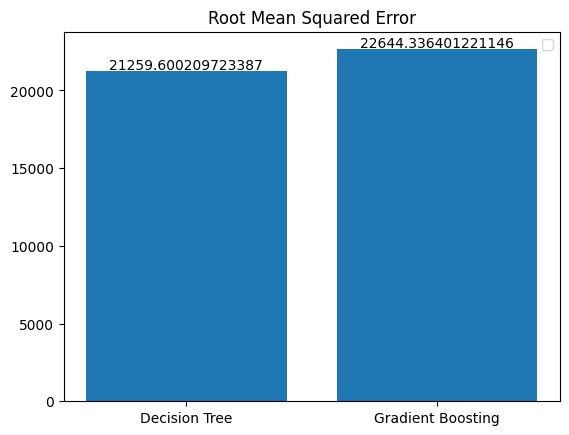

In [475]:
x = np.array(['Decision Tree', 'Gradient Boosting'])
y = np.array([decision_rmse, gradient_rmse])

plt.bar(x, y)
plt.title('Root Mean Squared Error')
plt.legend()

for index, value in enumerate(y):
    plt.text(x=index, y=value + 100, s=str(value), ha='center')

plt.show()

In [476]:
# fuji['x'] = fuji['Date'].shift(1)
# fuji['x'] = pd.to_numeric(fuji['x'], errors='coerce')
# fuji['x'].interpolate()
